# Question 3 (Part b): Poisson problem over a circular domain

In [72]:
#Initialization 

import dolfin as dl
import matplotlib.pyplot as plt
import numpy as np
import mshr
import logging

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

In [73]:
#1. Mesh generation
#mesh = mshr.generate_mesh(mshr.Circle(dl.Point(0.,0.),1.),40) #Not working
mesh = dl.Mesh("circle.xml")

In [74]:
#2. Defining the finite element space
Vh= dl.FunctionSpace(mesh,"CG",2)
u = dl.TrialFunction(Vh)
v_test = dl.TestFunction(Vh)

In [75]:
#3. Defining the functions
f = dl.Expression("exp(-100*(pow(x[0],2)+pow(x[1],2)))",degree=4)
A1= dl.Constant(((10.0, 0.0),(0.0, 10.0)))
A2= dl.Constant(((1.0 ,-5.0),(-5.0,100.0)))


In [76]:
#4. Making the stiffness and rhs functional forms
stiffness_form_A1 = dl.inner(A1*dl.grad(u), dl.grad(v_test)) * dl.dx
stiffness_form_A2 = dl.inner(A2*dl.grad(u), dl.grad(v_test)) * dl.dx
rhs_form          = f * v_test * dl.dx

In [77]:
#5. Implementing the boundary conditions
def boundary(x,on_boundary):
    return on_boundary
u0 = dl.Constant(0.)
bc = dl.DirichletBC(Vh, u0, boundary)

In [78]:
#6. Assemble matrices and solve the system
u1 = dl.Function(Vh) #solution initialization for A1
u2 = dl.Function(Vh) #solution initialization for A2

dl.solve(stiffness_form_A1==rhs_form,u1,bc)
dl.solve(stiffness_form_A2==rhs_form,u2,bc)

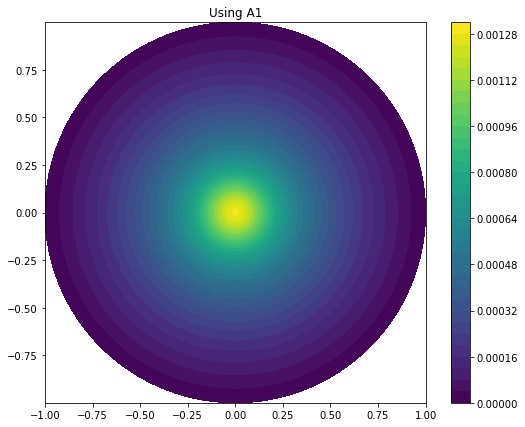

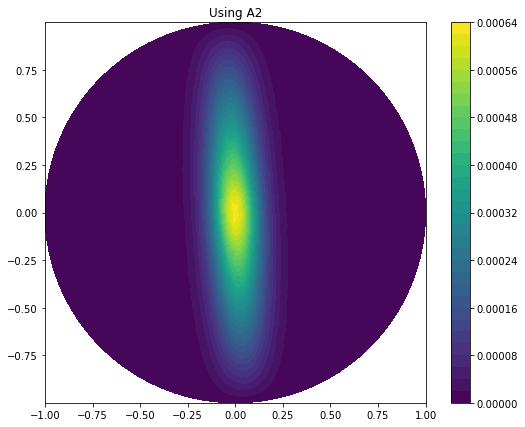

In [82]:
plt.figure(figsize=(9,7))
plot1 = dl.plot(u1)
plt.title("Using A1")
plt.colorbar(plot1)
plt.savefig("Q3b_A1.png")
plt.figure(figsize=(9,7))
plot2 = dl.plot(u2)
plt.title("Using A2")
plt.colorbar(plot2)
plt.savefig("Q3b_A2.png")
plt.show()

# Comparison of the results

## The conductivity tensor $A_1$ is isotropic and therefore the solution is radially symmetric. However, $A_2$ is anisotropic tensor which has 100 times more conductivity in y direction than x. Also, due to off-diagonal terms, the ellipse is not entirely vertical.



# Question 4: Implementing the image denoising problem

## Part (a): Solving using Tikhanov (TN) regularization